<a href="https://colab.research.google.com/github/humayun-mhk/Scikit_learn_2/blob/main/KNR%20using%20housing%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNeighborsRegressor

Dataset Preview:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Sample Predictions:
Actual: 0.48, Predicted: 0.50
Actual: 0.46, Predicted: 0.76
Actual: 5.00, Predicted: 4.77
Actual: 2.19, Predicted: 2.88
Actual: 2.78, Predicted: 2.75
Actual: 1.59, Predicted: 1.78
Actual: 1.98, Predicted: 2.73
Actual: 1.57, Predicted: 1.93
Actual: 3.40, Predicted: 2.13
Actual: 4.47, Predicted: 4.94

Model Evaluation:
Mean Squared Error: 0.4300
R² Score: 0.6719


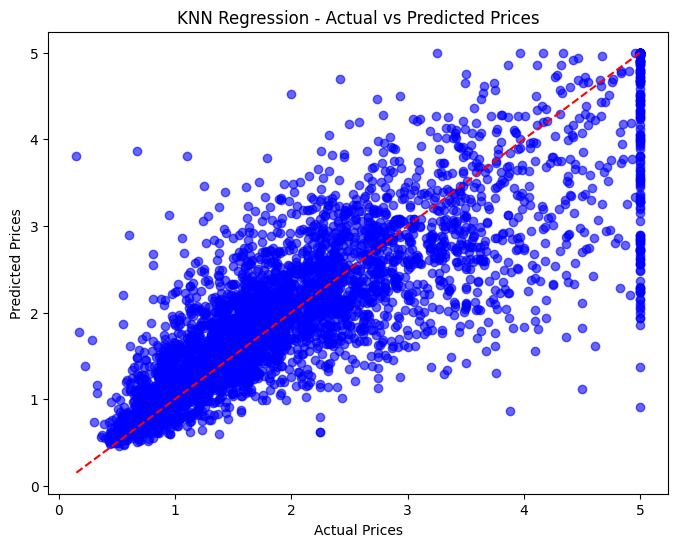

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset (alternative to Boston Housing, which was removed)
dataset = fetch_california_housing()
X = dataset.data  # Features
y = dataset.target  # Target variable (House Prices)

# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=dataset.feature_names)
df['Price'] = y

# Print the first 5 rows of the dataset
print("Dataset Preview:\n", df.head())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Train the model
knn_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_reg.predict(X_test_scaled)

# Print sample predictions
print("\nSample Predictions:")
for i in range(10):  # Print first 10 predictions
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}")

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN Regression - Actual vs Predicted Prices")
plt.show()
